# 혼공머 02-2
> 데이터 전처리

- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [17]:
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# 데이터 준비

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

## 리스트 붙이기 연습

In [4]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [11]:
# 물고기 데이터에 적용
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


> 가지런히 정렬된 모습으로 출력된다.

## 원소가 하나인 리스트 만들기

In [12]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [13]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [14]:
fish_target = np.concatenate((np.ones(35),np.zeros(14)))  # concatenate는 옆으로 이어 붙인다.

In [15]:
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 사이킷런으로 훈련 세트와 테스트 세트 나누기

## train_test_split()  임포트 필요

### 훈련세트와 테스트 세트 생성, random_state= 자동으로 랜덤시드 생성

In [19]:
train_input , test_input , train_target , test_target = train_test_split(fish_data,fish_target,random_state=42)
# 기본적으로 25%를 테스트 세트로 떼어냄

In [20]:
print(train_input.shape , test_input.shape)

(36, 2) (13, 2)


In [21]:
print(train_target.shape , test_target.shape)

(36,) (13,)


In [23]:
print(test_target)  # 도미와 빙어가 잘 섞였는지 보여줌, 세트비율 3.3 : 1

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


> 샘플링 편향 나타남   $\to$ stratify로 해결

In [24]:
train_input , test_input , train_target , test_target = train_test_split(fish_data,fish_target,stratify = fish_target,random_state=42)

In [25]:
print(test_target)   # 세트 비율 2.25 :1

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# 수상한 도미 한마리

## knearest 해보기 

In [26]:
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

#### 새로운 데이터 분류 해보기

In [30]:
print(kn.predict([[25,150]]))

[0.]


> 왜 0인지 확인하기

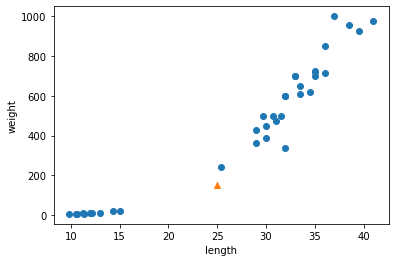

In [33]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

>이상하게 분류된다..


> k최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용.

> 거리가 가까운 데이터 확인

In [34]:
distances , indexs = kn.kneighbors([[25, 150]])

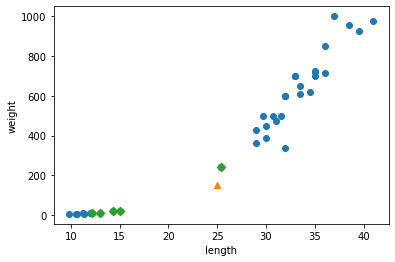

In [35]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexs,0], train_input[indexs,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

맷플랏립 마커 리스트 : https://bit.ly/matplotlib_marker

> 세모와 가장 가까운 5개가 다이아몬드인데 4개가 빙어

In [39]:
print(distances) # x축과 y축의 범위가 달라서 이상하게 보이는 것(스케일이 다르다)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 거리 기반의 알고리즘을 이용할 때는 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없다!
> 특성값을 일정한 기준으로 처리가 필요 : 데이터 전처리

# 표준점수 전처리 (standard score)

> 평균을 빼고 표준편차를 나누어준다. 

In [42]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)   #axis=0 : 열 기준, axis=1 : 행 기준

In [43]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [45]:
train_scaled = (train_input - mean) / std  #넘파이 배열 사이의 계산 : Broadcasting

# 전처리 데이터로 모델 훈련하기

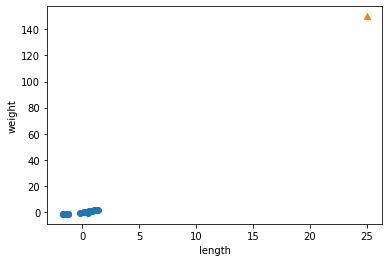

In [46]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 이상한 모양 $\to$ 값의 범위가 크게 달라졌기 때문

> 동일한 기준으로 분석할 샘플데이터 변환

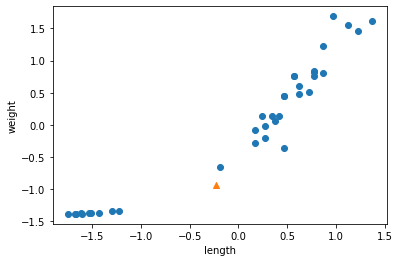

In [47]:
new = ([25, 150] - mean ) /std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 축의 범위가 -1.5~1.5로 변경

## 테스트 세트로 평가

In [48]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

> 같은 비율로 산점도를 그려야 함

In [49]:
test_scaled = (test_input - mean)/std

평가

In [50]:
kn.score(test_scaled,test_target)

1.0

## kneighbors()로 이 샘플의 k최근접 이웃 구하고 산점도

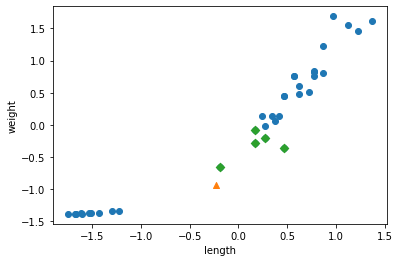

In [51]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

> 세모에 가장 가까운 샘플은 모두 다이아몬드!!